In [1]:
# Analysing USDJPY

In [2]:
#!pip install numpy 
#!pip install pandas
#!pip install datetime
#!pip install matplotlib.pyplot as plt
#!pip install mplfinance as mpf
#!pip install seaborn as sns
!pip install talib as ta
!pip install math

ERROR: Could not find a version that satisfies the requirement talib
ERROR: No matching distribution found for talib
ERROR: Could not find a version that satisfies the requirement math
ERROR: No matching distribution found for math


In [3]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import talib

In [4]:
!pip install yfinance

In [5]:
import yfinance as yf

In [6]:
# Downloading 3M India company from Yahoo Finance
df= yf.download("JPY=X", period ="7d", interval="5m")

[*********************100%***********************]  1 of 1 completed


In [7]:
#df

In [8]:
#Writing a strategy to code to generate a buy and sell signal as per guidelines
# 1 . Moving average crossover 3, 8 , if 3 is above 8 , buy signal
# 2. If 8 Moving Average above 3, generate a sell signal


In [9]:
# Extraction values of SMA 3 and SMA 8 

In [10]:
# Considering only closing values for predicting trend
Close = df["Close"]

In [11]:
# Checking the datatype of Close
print(type(Close))

<class 'pandas.core.series.Series'>


In [12]:
# Extracting 3 sma using talib library
sma3 = talib.SMA(Close, timeperiod = 3)

In [13]:
# Printing sma8
sma3

Datetime
2021-05-24 00:00:00+01:00           NaN
2021-05-24 00:05:00+01:00           NaN
2021-05-24 00:10:00+01:00    108.928998
2021-05-24 00:15:00+01:00    108.926666
2021-05-24 00:20:00+01:00    108.929001
                                ...    
2021-06-01 05:35:00+01:00    109.472333
2021-06-01 05:40:00+01:00    109.477999
2021-06-01 05:45:00+01:00    109.485667
2021-06-01 05:50:00+01:00    109.492332
2021-06-01 05:55:58+01:00    109.498665
Length: 1773, dtype: float64

In [14]:
# Extracting 8 sma using talib library
sma8 = talib.SMA(Close, timeperiod = 8)

In [15]:
# Printing sma8 
sma8

Datetime
2021-05-24 00:00:00+01:00           NaN
2021-05-24 00:05:00+01:00           NaN
2021-05-24 00:10:00+01:00           NaN
2021-05-24 00:15:00+01:00           NaN
2021-05-24 00:20:00+01:00           NaN
                                ...    
2021-06-01 05:35:00+01:00    109.460375
2021-06-01 05:40:00+01:00    109.462250
2021-06-01 05:45:00+01:00    109.468500
2021-06-01 05:50:00+01:00    109.474750
2021-06-01 05:55:58+01:00    109.481249
Length: 1773, dtype: float64

In [16]:
# Checking the datatype of sma8
print(type(sma8))

<class 'pandas.core.series.Series'>


In [17]:
# Creating a new column by incorporating the difference between SMA3 and SMA8
df["sma3"] = sma3
df["sma8"] = sma8

In [18]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-24 00:00:00+01:00,108.945000,108.946999,108.900002,108.933998,108.933998,0,NaN,NaN
2021-05-24 00:05:00+01:00,108.933998,108.933998,108.889999,108.922997,108.922997,0,NaN,NaN
2021-05-24 00:10:00+01:00,108.922997,108.935997,108.879997,108.930000,108.930000,0,108.928998,NaN
2021-05-24 00:15:00+01:00,108.934998,108.938004,108.889999,108.927002,108.927002,0,108.926666,NaN
2021-05-24 00:20:00+01:00,108.928001,108.938004,108.889999,108.930000,108.930000,0,108.929001,NaN
...,...,...,...,...,...,...,...,...
2021-06-01 05:35:00+01:00,109.475998,109.482002,109.430000,109.470001,109.470001,0,109.472333,109.460375
2021-06-01 05:40:00+01:00,109.470001,109.501999,109.440002,109.487000,109.487000,0,109.477999,109.462250
2021-06-01 05:45:00+01:00,109.480003,109.508003,109.459999,109.500000,109.500000,0,109.485667,109.468500


In [19]:
# Filling NAN vales backwards for Dataframe
df =df.fillna( method = "bfill")

In [20]:
# Printing dataframe after filling missing/nan values
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-24 00:00:00+01:00,108.945000,108.946999,108.900002,108.933998,108.933998,0,108.928998,108.928500
2021-05-24 00:05:00+01:00,108.933998,108.933998,108.889999,108.922997,108.922997,0,108.928998,108.928500
2021-05-24 00:10:00+01:00,108.922997,108.935997,108.879997,108.930000,108.930000,0,108.928998,108.928500
2021-05-24 00:15:00+01:00,108.934998,108.938004,108.889999,108.927002,108.927002,0,108.926666,108.928500
2021-05-24 00:20:00+01:00,108.928001,108.938004,108.889999,108.930000,108.930000,0,108.929001,108.928500
...,...,...,...,...,...,...,...,...
2021-06-01 05:35:00+01:00,109.475998,109.482002,109.430000,109.470001,109.470001,0,109.472333,109.460375
2021-06-01 05:40:00+01:00,109.470001,109.501999,109.440002,109.487000,109.487000,0,109.477999,109.462250
2021-06-01 05:45:00+01:00,109.480003,109.508003,109.459999,109.500000,109.500000,0,109.485667,109.468500


Text(0.5, 1.0, 'Close Price of SMA3 and SMA8  ')

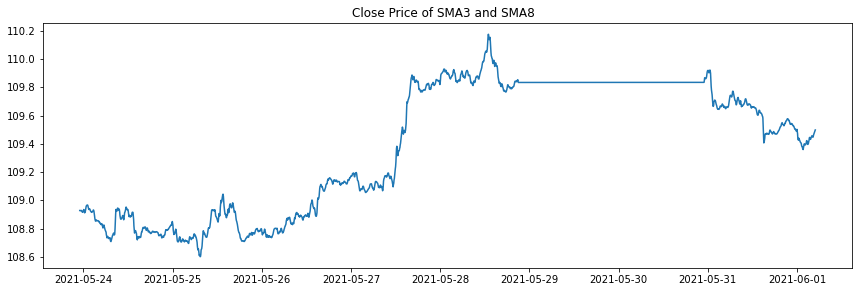

In [21]:
plt.figure(figsize=(14.5,4.5))
plt.plot(df['sma3'], label  ='sma3 & sma8')
plt.title('Close Price of SMA3 and SMA8  ')
#plt.figsave("20 Diff.png")

In [22]:
# Check when 3 sma if greater than or less than 8sma, print a buy signal or else print a sell signal.

In [23]:
# Check Atr value 
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-24 00:00:00+01:00,108.945000,108.946999,108.900002,108.933998,108.933998,0,108.928998,108.928500
2021-05-24 00:05:00+01:00,108.933998,108.933998,108.889999,108.922997,108.922997,0,108.928998,108.928500
2021-05-24 00:10:00+01:00,108.922997,108.935997,108.879997,108.930000,108.930000,0,108.928998,108.928500
2021-05-24 00:15:00+01:00,108.934998,108.938004,108.889999,108.927002,108.927002,0,108.926666,108.928500
2021-05-24 00:20:00+01:00,108.928001,108.938004,108.889999,108.930000,108.930000,0,108.929001,108.928500
...,...,...,...,...,...,...,...,...
2021-06-01 05:35:00+01:00,109.475998,109.482002,109.430000,109.470001,109.470001,0,109.472333,109.460375
2021-06-01 05:40:00+01:00,109.470001,109.501999,109.440002,109.487000,109.487000,0,109.477999,109.462250
2021-06-01 05:45:00+01:00,109.480003,109.508003,109.459999,109.500000,109.500000,0,109.485667,109.468500


In [24]:
df["Diff"] = sma3-sma8


In [25]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8,Diff
Datetime,,,,,,,,,
2021-05-24 00:00:00+01:00,108.945000,108.946999,108.900002,108.933998,108.933998,0,108.928998,108.928500,NaN
2021-05-24 00:05:00+01:00,108.933998,108.933998,108.889999,108.922997,108.922997,0,108.928998,108.928500,NaN
2021-05-24 00:10:00+01:00,108.922997,108.935997,108.879997,108.930000,108.930000,0,108.928998,108.928500,NaN
2021-05-24 00:15:00+01:00,108.934998,108.938004,108.889999,108.927002,108.927002,0,108.926666,108.928500,NaN
2021-05-24 00:20:00+01:00,108.928001,108.938004,108.889999,108.930000,108.930000,0,108.929001,108.928500,NaN
...,...,...,...,...,...,...,...,...,...
2021-06-01 05:35:00+01:00,109.475998,109.482002,109.430000,109.470001,109.470001,0,109.472333,109.460375,0.011958
2021-06-01 05:40:00+01:00,109.470001,109.501999,109.440002,109.487000,109.487000,0,109.477999,109.462250,0.015750
2021-06-01 05:45:00+01:00,109.480003,109.508003,109.459999,109.500000,109.500000,0,109.485667,109.468500,0.017167


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8,Diff
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.0,1773.000000,1773.000000,1.766000e+03
mean,109.244688,109.260657,109.205854,109.244999,109.244999,0.0,109.244676,109.243887,7.918539e-04
std,0.438697,0.439217,0.438159,0.438474,0.438474,0.0,0.438301,0.438030,1.918664e-02
min,108.580002,108.620003,108.529999,108.580002,108.580002,0.0,108.602333,108.614875,-1.146660e-01
25%,108.830002,108.843002,108.790001,108.830002,108.830002,0.0,108.830332,108.830873,-8.625031e-03
50%,109.120003,109.135002,109.089996,109.123001,109.123001,0.0,109.120331,109.122000,6.357829e-07
75%,109.681999,109.697998,109.650002,109.681999,109.681999,0.0,109.681333,109.684501,9.625276e-03
max,110.195000,110.198997,110.139999,110.195999,110.195999,0.0,110.175334,110.157750,1.093330e-01


Text(0.5, 1.0, 'SMA3 - SMA8 Values')

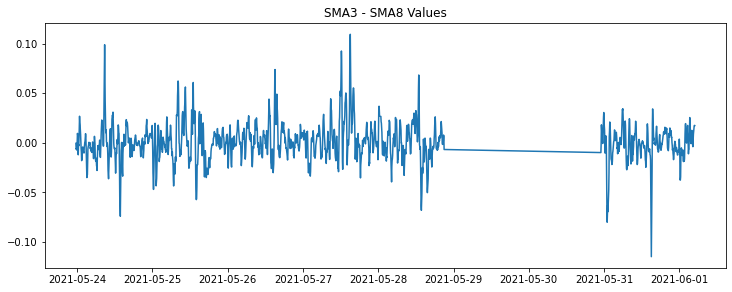

In [27]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Diff'], label  ='Diff Values')
plt.title('SMA3 - SMA8 Values')

In [29]:
# Using a for loop to compare 3sma with 8sma and generating a signal.
postition =0
#position = int
for i in range(len(df)):
    if -0.05 < df["sma3"][i] - df["sma8"][i] > 0.05:  # The value should be considered with ATR (7) Inicator.
        #print(" Buy Signal")
        print("Buy Entry Price", df["Close"][i])
        print("Exit Price Target", df["Close"][i] +0.08 ) # Risk Reward Ratio 1:2, Take profit = 4 X ATR for 5 minute timeframe
        print("Exit Price Stoploss", df["Close"][i]-0.04) # Risk Reward Ratio 1:2, Stop loss = 2 X ATR for 5 minute timeframe
        
        print("**********************")
        #print("Datetime", df["Datetime"])
    else:
        #print('Sell signal')
        print("Sell Entry Price", df["Close"][i])
        print("Exit  Price Target", df["Close"][i] -0.08) # Risk Reward Ratio 1:2, Take profit = 4 X ATR for 5 minute timeframe
        print("Exit Price Stoploss", df["Close"][i] + 0.04) # Risk Reward Ratio 1:2, Stop loss = 2 X ATR for 5 minute timeframe
        print("**********************")
       

Sell Entry Price 108.93399810791016
Exit  Price Target 108.85399810791016
Exit Price Stoploss 108.97399810791016
**********************
Sell Entry Price 108.9229965209961
Exit  Price Target 108.8429965209961
Exit Price Stoploss 108.9629965209961
**********************
Sell Entry Price 108.93000030517578
Exit  Price Target 108.85000030517578
Exit Price Stoploss 108.97000030517579
**********************
Sell Entry Price 108.927001953125
Exit  Price Target 108.847001953125
Exit Price Stoploss 108.967001953125
**********************
Sell Entry Price 108.93000030517578
Exit  Price Target 108.85000030517578
Exit Price Stoploss 108.97000030517579
**********************
Sell Entry Price 108.93000030517578
Exit  Price Target 108.85000030517578
Exit Price Stoploss 108.97000030517579
**********************
Sell Entry Price 108.9260025024414
Exit  Price Target 108.84600250244141
Exit Price Stoploss 108.96600250244141
**********************
Sell Entry Price 108.9280014038086
Exit  Price Target 108.

Exit Price Stoploss 108.80200103759766
**********************
Sell Entry Price 108.76200103759766
Exit  Price Target 108.68200103759766
Exit Price Stoploss 108.80200103759766
**********************
Sell Entry Price 108.73500061035156
Exit  Price Target 108.65500061035156
Exit Price Stoploss 108.77500061035157
**********************
Sell Entry Price 108.73999786376953
Exit  Price Target 108.65999786376953
Exit Price Stoploss 108.77999786376954
**********************
Sell Entry Price 108.7300033569336
Exit  Price Target 108.6500033569336
Exit Price Stoploss 108.7700033569336
**********************
Sell Entry Price 108.73999786376953
Exit  Price Target 108.65999786376953
Exit Price Stoploss 108.77999786376954
**********************
Sell Entry Price 108.7509994506836
Exit  Price Target 108.6709994506836
Exit Price Stoploss 108.7909994506836
**********************
Sell Entry Price 108.7509994506836
Exit  Price Target 108.6709994506836
Exit Price Stoploss 108.7909994506836
******************

Exit Price Stoploss 108.90399841308594
**********************
Sell Entry Price 108.88999938964844
Exit  Price Target 108.80999938964844
Exit Price Stoploss 108.92999938964844
**********************
Sell Entry Price 108.90599822998047
Exit  Price Target 108.82599822998047
Exit Price Stoploss 108.94599822998048
**********************
Sell Entry Price 108.89900207519531
Exit  Price Target 108.81900207519531
Exit Price Stoploss 108.93900207519532
**********************
Sell Entry Price 108.88600158691406
Exit  Price Target 108.80600158691406
Exit Price Stoploss 108.92600158691407
**********************
Sell Entry Price 108.99299621582031
Exit  Price Target 108.91299621582031
Exit Price Stoploss 109.03299621582032
**********************
Sell Entry Price 108.92500305175781
Exit  Price Target 108.84500305175781
Exit Price Stoploss 108.96500305175782
**********************
Sell Entry Price 108.9000015258789
Exit  Price Target 108.82000152587891
Exit Price Stoploss 108.94000152587891
**********

Sell Entry Price 108.90599822998047
Exit  Price Target 108.82599822998047
Exit Price Stoploss 108.94599822998048
**********************
Sell Entry Price 108.91000366210938
Exit  Price Target 108.83000366210938
Exit Price Stoploss 108.95000366210938
**********************
Sell Entry Price 108.90499877929688
Exit  Price Target 108.82499877929688
Exit Price Stoploss 108.94499877929688
**********************
Sell Entry Price 108.91899871826172
Exit  Price Target 108.83899871826172
Exit Price Stoploss 108.95899871826173
**********************
Sell Entry Price 108.90599822998047
Exit  Price Target 108.82599822998047
Exit Price Stoploss 108.94599822998048
**********************
Sell Entry Price 108.91999816894531
Exit  Price Target 108.83999816894531
Exit Price Stoploss 108.95999816894532
**********************
Sell Entry Price 108.87999725341797
Exit  Price Target 108.79999725341797
Exit Price Stoploss 108.91999725341798
**********************
Sell Entry Price 108.91999816894531
Exit  Price 

Exit Price Stoploss 109.20200256347657
**********************
Sell Entry Price 109.14399719238281
Exit  Price Target 109.06399719238281
Exit Price Stoploss 109.18399719238282
**********************
Sell Entry Price 109.16500091552734
Exit  Price Target 109.08500091552735
Exit Price Stoploss 109.20500091552735
**********************
Sell Entry Price 109.1729965209961
Exit  Price Target 109.0929965209961
Exit Price Stoploss 109.2129965209961
**********************
Sell Entry Price 109.18000030517578
Exit  Price Target 109.10000030517578
Exit Price Stoploss 109.22000030517579
**********************
Sell Entry Price 109.16999816894531
Exit  Price Target 109.08999816894531
Exit Price Stoploss 109.20999816894532
**********************
Sell Entry Price 109.16500091552734
Exit  Price Target 109.08500091552735
Exit Price Stoploss 109.20500091552735
**********************
Sell Entry Price 109.18499755859375
Exit  Price Target 109.10499755859375
Exit Price Stoploss 109.22499755859376
************

Exit Price Stoploss 109.94799713134766
**********************
Sell Entry Price 109.89600372314453
Exit  Price Target 109.81600372314453
Exit Price Stoploss 109.93600372314454
**********************
Sell Entry Price 109.83000183105469
Exit  Price Target 109.75000183105469
Exit Price Stoploss 109.8700018310547
**********************
Sell Entry Price 109.8479995727539
Exit  Price Target 109.76799957275391
Exit Price Stoploss 109.88799957275391
**********************
Sell Entry Price 109.84700012207031
Exit  Price Target 109.76700012207031
Exit Price Stoploss 109.88700012207032
**********************
Sell Entry Price 109.8479995727539
Exit  Price Target 109.76799957275391
Exit Price Stoploss 109.88799957275391
**********************
Sell Entry Price 109.84300231933594
Exit  Price Target 109.76300231933594
Exit Price Stoploss 109.88300231933594
**********************
Sell Entry Price 109.8280029296875
Exit  Price Target 109.7480029296875
Exit Price Stoploss 109.8680029296875
***************

Exit Price Stoploss 109.69000152587891
**********************
Sell Entry Price 109.6500015258789
Exit  Price Target 109.57000152587891
Exit Price Stoploss 109.69000152587891
**********************
Sell Entry Price 109.64700317382812
Exit  Price Target 109.56700317382813
Exit Price Stoploss 109.68700317382813
**********************
Sell Entry Price 109.66699981689453
Exit  Price Target 109.58699981689453
Exit Price Stoploss 109.70699981689454
**********************
Sell Entry Price 109.66000366210938
Exit  Price Target 109.58000366210938
Exit Price Stoploss 109.70000366210938
**********************
Sell Entry Price 109.66000366210938
Exit  Price Target 109.58000366210938
Exit Price Stoploss 109.70000366210938
**********************
Sell Entry Price 109.66999816894531
Exit  Price Target 109.58999816894531
Exit Price Stoploss 109.70999816894532
**********************
Sell Entry Price 109.6500015258789
Exit  Price Target 109.57000152587891
Exit Price Stoploss 109.69000152587891
***********

Sell Entry Price 109.47699737548828
Exit  Price Target 109.39699737548828
Exit Price Stoploss 109.51699737548829
**********************
Sell Entry Price 109.47000122070312
Exit  Price Target 109.39000122070313
Exit Price Stoploss 109.51000122070313
**********************
Sell Entry Price 109.48699951171875
Exit  Price Target 109.40699951171875
Exit Price Stoploss 109.52699951171876
**********************
Sell Entry Price 109.5
Exit  Price Target 109.42
Exit Price Stoploss 109.54
**********************
Sell Entry Price 109.48999786376953
Exit  Price Target 109.40999786376953
Exit Price Stoploss 109.52999786376954
**********************
Sell Entry Price 109.50599670410156
Exit  Price Target 109.42599670410156
Exit Price Stoploss 109.54599670410157
**********************
